In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('USA_HOUSING.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [6]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [9]:
del df['Address']

In [20]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


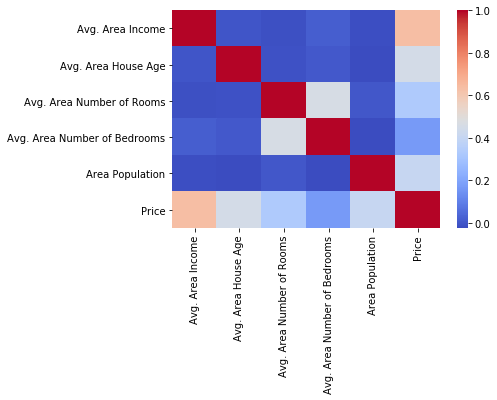

In [34]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [35]:
df.drop('Avg. Area Number of Bedrooms', axis=1, inplace=True)

In [36]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,Price
0,79545.458574,5.682861,7.009188,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,26354.109472,6.309435e+05


In [51]:
df.columns.size

5

In [54]:
X = df.iloc[:, :4]

In [55]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
0,79545.458574,5.682861,7.009188,23086.800503
1,79248.642455,6.002900,6.730821,40173.072174
2,61287.067179,5.865890,8.512727,36882.159400
3,63345.240046,7.188236,5.586729,34310.242831
4,59982.197226,5.040555,7.839388,26354.109472


In [62]:
Y = df['Price']

In [63]:
Y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [66]:
type(Y)

pandas.core.series.Series

In [67]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [100]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 3556 to 3413
Data columns (total 4 columns):
Avg. Area Income             3500 non-null float64
Avg. Area House Age          3500 non-null float64
Avg. Area Number of Rooms    3500 non-null float64
Area Population              3500 non-null float64
dtypes: float64(4)
memory usage: 136.7 KB


In [101]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 4416 to 4091
Data columns (total 4 columns):
Avg. Area Income             1500 non-null float64
Avg. Area House Age          1500 non-null float64
Avg. Area Number of Rooms    1500 non-null float64
Area Population              1500 non-null float64
dtypes: float64(4)
memory usage: 58.6 KB


In [79]:
from sklearn.linear_model import LinearRegression

In [102]:
model = LinearRegression()

In [103]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
Y_pred = model.predict(X_test)

In [105]:
coeff = model.coef_

In [106]:
coeff

array([2.17331707e+01, 1.67320312e+05, 1.23311159e+05, 1.53287543e+01])

In [107]:
df1 = pd.DataFrame()

In [108]:
df1['coeff'] = coeff

In [109]:
df1.head()

,coeff
0,21.733171
1,167320.312102
2,123311.158582
3,15.328754


In [110]:
df1.set_index(X_train.columns)

,coeff
Avg. Area Income,21.733171
Avg. Area House Age,167320.312102
Avg. Area Number of Rooms,123311.158582
Area Population,15.328754


In [112]:
df1 = pd.DataFrame(index=list(X_train.columns), columns=['Coeff'], data=model.coef_)

In [113]:
df1

,Coeff
Avg. Area Income,21.733171
Avg. Area House Age,167320.312102
Avg. Area Number of Rooms,123311.158582
Area Population,15.328754


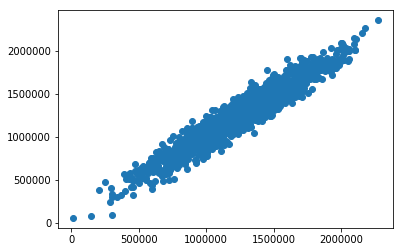

In [114]:
plt.scatter(Y_test, Y_pred)

(array([  4.,  53., 125., 230., 356., 347., 229., 115.,  36.,   5.]),
 array([-307482.8521742 , -244442.97776808, -181403.10336197,
        -118363.22895585,  -55323.35454973,    7716.51985638,
          70756.3942625 ,  133796.26866862,  196836.14307474,
         259876.01748085,  322915.89188697]),
 <a list of 10 Patch objects>)

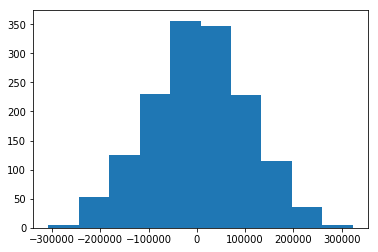

In [115]:
plt.hist(Y_pred - Y_test)

C:\Users\gjawa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


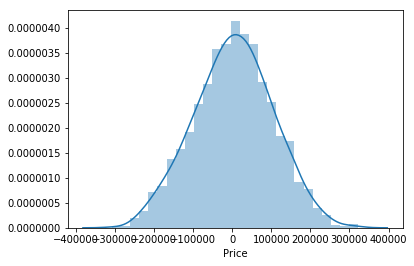

In [116]:
sns.distplot(Y_pred - Y_test)